Test if it is true that there will be no extinction if $\Lambda V^T$ is stable even when $J$ is unstable.

Use self-renewing resource.

In [1]:
using LinearAlgebra, DifferentialEquations, Plots, Statistics

In [456]:
function ResConLog!(du,u,para,t)
    N_s,N_r,G,C,g,K,δ = para
    du[1:N_s] = u[1:N_s] .* (G*u[N_s+1:N_r+N_s] - δ)
    du[N_s+1:N_r+N_s] = u[N_s+1:N_r+N_s] .* (g.*(K - u[N_s+1:N_r+N_s]) - C'*u[1:N_s]) .+ 1e-9
end

ResConLog! (generic function with 1 method)

In [457]:
N = 64
M = 32

ρ = .5

Tgc = randn(N, M , 2)
G = Tgc[:,:,1]
C = ρ * G + √(1-ρ^2) * Tgc[:,:,2]

G = G .+ 10.0
C = C .+ 10.0

Ss = 0.01 .+ 0.99*rand(N)
Rs = 0.01 .+ 0.99*rand(M)

δ = G * Rs
g = (0.1 .+ 0.9*rand(M)) * 1
K = C' * Ss ./ g + Rs;

In [458]:
condition(u, t, integrator) = any(u .< 1e-10)
function affect!(integrator)
    integrator.u[integrator.u.<1e-10] .= 1e-10
end
cb = DiscreteCallback(condition, affect!);

In [463]:
tspan = (0.0, 5000.0) # time for one test solution

para = (N,M,G,C,g,K,δ)

u0 = zeros(N+M)
u0[1:N] = Ss .* (1 .+ 1.0*(rand(N) .- 0.5))
u0[N+1:end] = Rs .* (1 .+ 1.0*(rand(M) .- 0.5))

prob = ODEProblem(ResConLog!,u0,tspan,para)
#VCABM3() or Tsit5() or TRBDF2(), AutoVern7(Rodas4())
sol = solve(prob, VCABM3(), saveat = 10, isoutofdomain = (u,p,t)->any(x->x < 0.0,u));

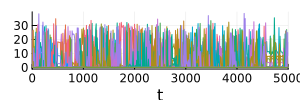

In [464]:
plot(sol,idxs = 1:N,legend = false,
    size = (300,100))

In [465]:
Send = mean(sol.u[end-50:end])[1:N]
length(Send[Send .> 1e-7]) / N

0.1875

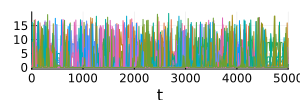

In [466]:
plot(sol,idxs = N+1:N+M,legend = false,
size = (300,100))